# **Tutorial 8: Masking with One Condition**

**Week 1, Day 1, Introduction to the Climate System**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Danika Gupta, Younkap Nina Duplex, Chi Zhang, Ohad Zivan 

**Content editors:** Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** TBD

**Our 2023 Sponsors:** NASA TOPS



###**Code and Data Sources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).

## **Tutorial 8 Objectives**

One useful tool for assessing climate data is to mask the regions where the data does not fall within a certain range of values that are of interest. For example, when analyzing a map of global precipitation, we could mask regions that contain a value of mean annual precipitation above or below a specific value or range of values. 

In this tutorial we will learn how to mask data with one condition, and will apply this to our map of global SST.

## Imports


In [3]:
!pip install matplotlib.pyplot
!pip install numpy
!pip install xarray
!pip install pythia_datasets
!pip install pandas

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd

Let's load the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [5]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath,decode_times=False)
new_time = pd.date_range(start='2000-01-15', end='2014-12-15', periods=180)
ds = ds.assign(time=new_time)

/Users/chi/miniconda3/lib/python3.10/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


## Masking Data


Using the `xr.where()` or `.where()` method, elements of an xarray Dataset or xarray DataArray that satisfy a given condition or multiple conditions can be replaced/masked. To demonstrate this, we are going to use the `.where()` method on the `tos` DataArray. 

We will use the same sea surface temperature dataset:

In [6]:
ds

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-15 ... 2014-12-15
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) float64 ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

### Using `where` with one condition

Imagine we wish to analyze just the last time in the dataset. We could of course use `.isel()` for this:

In [7]:
sample = ds.tos.isel(time=-1)
sample

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
[64800 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2014-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Unlike `.isel()` and `.sel()` that change the shape of the returned results, `.where()` preserves the shape of the original data. It accomplishes this by returning values from the original DataArray or Dataset if the `condition` is `True`, and fills in values (by default `nan`) wherever the `condition` is `False`. 

Before applying it, let's look at the [`.where()` documentation](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html). As the documention points out, the conditional expression in `.where()` can be: 

- a DataArray
- a Dataset
- a function

For demonstration purposes, let's use `.where()` to mask locations with temperature values greater than `0`:

In [8]:
masked_sample = sample.where(sample < 0.0)
masked_sample

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7561191, -1.7561648, -1.7562052, ..., -1.7559224, -1.7559862,
        -1.7560585],
       [-1.7506379, -1.7506577, -1.7506672, ..., -1.7505083, -1.750561 ,
        -1.7506049],
       [-1.7462697, -1.7462667, -1.7462606, ..., -1.7463093, -1.746299 ,
        -1.7462848]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

Let's plot both our original sample, and the masked sample:

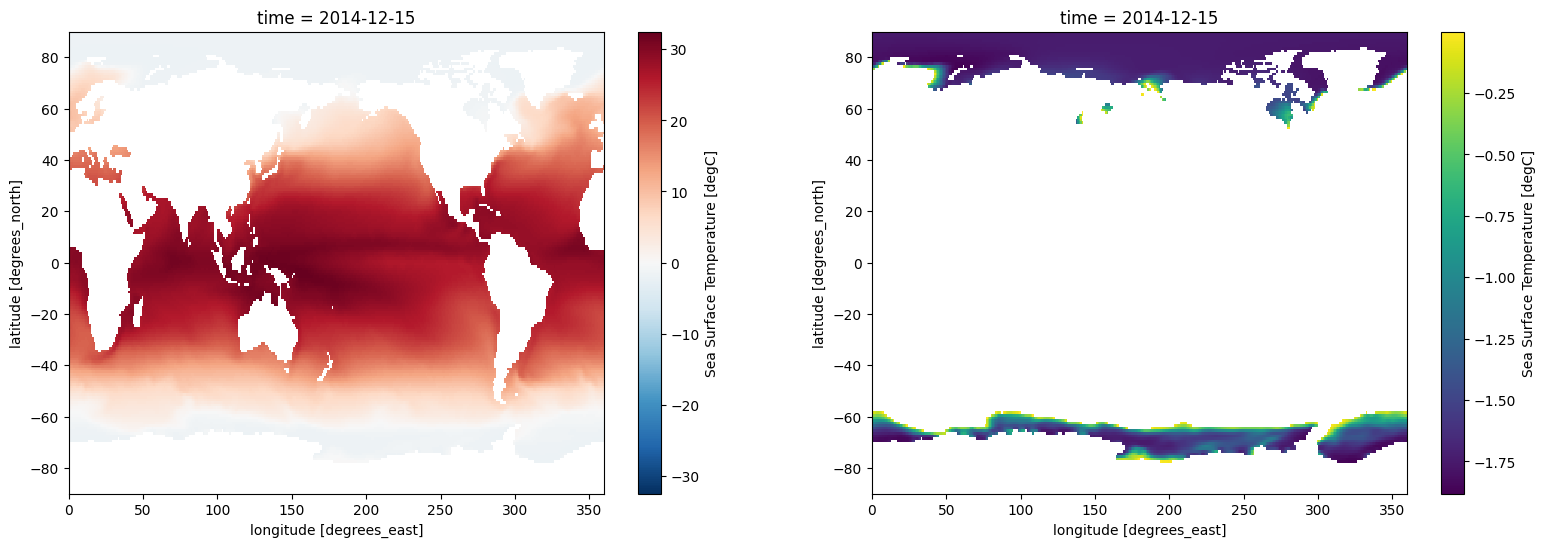

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 6))
sample.plot(ax=axes[0])
masked_sample.plot(ax=axes[1]);

## Climate Connection 

What is the purpose of masking in the analysis of climate data, and how might it be useful when looking at a map of global precipitation?

<details>
<summary>Click here to see the answer</summary>
    
>_Answer_: Masking in climate data analysis is a crucial method that allows us to focus on specific portions of data that meet particular criteria. By "masking," or hiding values that do not meet these criteria, we can parts of the data that matter most to our research questions.

</details>

## Summary

In this tutorial, we've explored the application of masking tools in the analysis of Sea Surface Temperature (SST) maps. Through masking, we've been able to focus our attention on areas where the SST is below 0°C. These are the regions where changes in the ice-albedo feedback mechanism are most evident in our present day. This has facilitated a more targeted analysis and clearer understanding of the data.



